In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import ast
from datasets import load_dataset

# load dataset 
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

C:\Users\HP\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
job_tiltle = 'Data Analyst'
job_country = 'United States'
df_DA_US = df[(df['job_country'] == job_country) & (df['job_title_short'] == job_tiltle)].copy()
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,excel,"{'analyst_tools': ['excel', 'powerpoint']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,sql,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,vba,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,tableau,"{'analyst_tools': ['tableau', 'excel', 'altery..."
784882,Data Analyst,Merchandising Analyst (Data Analyst),"Denton, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-04 15:29:24,False,False,United States,year,87500.0,NaN,Insight Global,excel,"{'analyst_tools': ['tableau', 'excel', 'altery..."


In [3]:
df_job_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_job_skills = df_job_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})
df_job_skills


,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


In [4]:
DA_count_skills = len(df_DA_US)
DA_count_skills

17440

In [5]:
df_job_skills['skill_percent'] = df_job_skills['skill_count'] / DA_count_skills * 100

top_12 = 12
df_job_skills = df_job_skills.head(top_12)

df_job_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,14.380734
excel,1808,84392.00,10.366972
python,1431,97500.00,8.205275
tableau,1364,92875.00,7.821101
sas,926,90000.00,5.309633
r,893,92500.00,5.120413
power bi,838,90000.00,4.805046
powerpoint,462,85000.00,2.649083
word,461,81194.75,2.643349


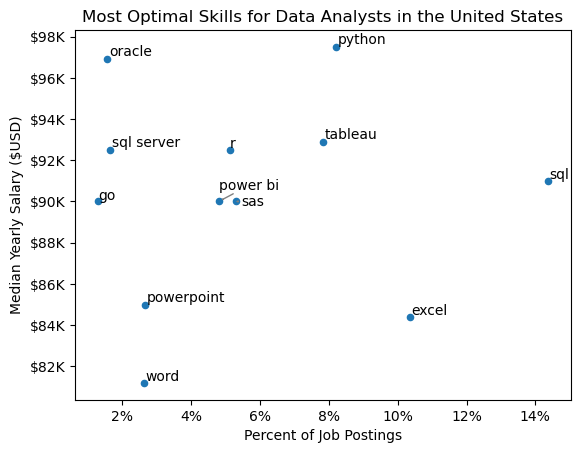

In [6]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

df_job_skills.plot(kind='scatter', x='skill_percent', y='median_salary')

texts = []
for i, col in enumerate(df_job_skills.index):
    texts.append(plt.text(df_job_skills['skill_percent'].iloc[i], df_job_skills['median_salary'].iloc[i], col))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))
plt.title(f'Most Optimal Skills for {job_tiltle}s in the {job_country}')
plt.ylabel('Median Yearly Salary ($USD)')
plt.xlabel('Percent of Job Postings')
plt.show()

In [7]:
import pandas as pd

# Assume df is your DataFrame
# Step 1: Drop rows where job_type_skills is None or NaN
df_clean = df[df['job_type_skills'].notna()]

# Step 2: Convert string to actual dictionary if needed (e.g., from image, they may be strings)
import ast
df_clean['job_type_skills'] = df_clean['job_type_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Step 3: Combine all dictionaries into one
combined_skills = {}
for d in df_clean['job_type_skills']:
    for key, value in d.items():
        if key not in combined_skills:
            combined_skills[key] = value
        else:
            combined_skills[key].extend(value)

# Optional: Remove duplicates from each list
for key in combined_skills:
    combined_skills[key] = list(set(combined_skills[key]))

# Output the combined dictionary
combined_skills


C:\Users\HP\AppData\Local\Temp\ipykernel_4656\1600295535.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['job_type_skills'] = df_clean['job_type_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


{'analyst_tools': ['qlik',
  'power bi',
  'outlook',
  'looker',
  'sap',
  'ssrs',
  'msaccess',
  'esquisse',
  'visio',
  'datarobot',
  'spreadsheet',
  'dax',
  'splunk',
  'sheets',
  'ssis',
  'spss',
  'microstrategy',
  'nuix',
  'word',
  'powerpoint',
  'alteryx',
  'ms access',
  'sharepoint',
  'sas',
  'tableau',
  'cognos',
  'excel',
  'powerbi'],
 'programming': ['bash',
  'lisp',
  'haskell',
  'vb.net',
  'vba',
  'no-sql',
  'pascal',
  'visual basic',
  'sass',
  'julia',
  'groovy',
  'go',
  'kotlin',
  'perl',
  'rust',
  'javascript',
  'visualbasic',
  'swift',
  'clojure',
  'assembly',
  'css',
  'lua',
  'mongodb',
  'delphi',
  'elixir',
  'erlang',
  'c',
  't-sql',
  'matlab',
  'mongo',
  'c#',
  'ruby',
  'powershell',
  'php',
  'nosql',
  'dart',
  'solidity',
  'objective-c',
  'apl',
  'cobol',
  'shell',
  'c++',
  'scala',
  'python',
  'crystal',
  'sql',
  'html',
  'f#',
  'golang',
  'java',
  'sas',
  'typescript',
  'r',
  'fortran',
  'oc

In [8]:
df_skills = pd.DataFrame([
    {'category': key, 'skill': skill}
    for key, skills in combined_skills.items()
    for skill in skills
])

df_skills

,category,skill
0,analyst_tools,qlik
1,analyst_tools,power bi
2,analyst_tools,outlook
3,analyst_tools,looker
4,analyst_tools,sap
...,...,...
251,sync,unify
252,sync,google chat
253,sync,ringcentral
254,sync,wire


In [9]:
df_plot = df_job_skills.merge(df_skills, left_on='job_skills', right_on='skill')
df_plot = df_plot.rename(columns={'category': 'technology'})
df_plot

,skill_count,median_salary,skill_percent,technology,skill
0,2508,91000.00,14.380734,programming,sql
1,1808,84392.00,10.366972,analyst_tools,excel
2,1431,97500.00,8.205275,programming,python
3,1364,92875.00,7.821101,analyst_tools,tableau
4,926,90000.00,5.309633,analyst_tools,sas
5,926,90000.00,5.309633,programming,sas
6,893,92500.00,5.120413,programming,r
7,838,90000.00,4.805046,analyst_tools,power bi
8,462,85000.00,2.649083,analyst_tools,powerpoint
9,461,81194.75,2.643349,analyst_tools,word


In [ ]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

# df_job_skills.plot(kind='scatter', x='skill_percent', y='median_salary')
sns.scatterplot(df_plot, x='skill_percent', y='median_salary',
                hue='technology')
sns.set_theme(style='ticks')
sns.despine()

texts = []
for i, col in enumerate(df_job_skills.index):
    texts.append(plt.text(df_job_skills['skill_percent'].iloc[i], df_job_skills['median_salary'].iloc[i], col))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

adjust_text(
    texts,
    ax=ax,
    arrowprops=dict(arrowstyle="->", color='gray', lw=1),
    expand_points=(1.2, 1.4),
    expand_text=(1.2, 1.4),
    force_text=0.5,
    force_points=0.3,
    only_move={'points':'y', 'text':'xy'},
    lim=500
)

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))
plt.title(f'Most Optimal Skills for {job_tiltle}s in the {job_country}')
plt.ylabel('Median Yearly Salary ($USD)')
plt.xlabel('Percent of Job Postings')
plt.show()

ValueError: Could not interpret value `category` for `hue`. An entry with this name does not appear in `data`.

C:\Users\HP\AppData\Local\Temp\ipykernel_4656\1041991594.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=12)


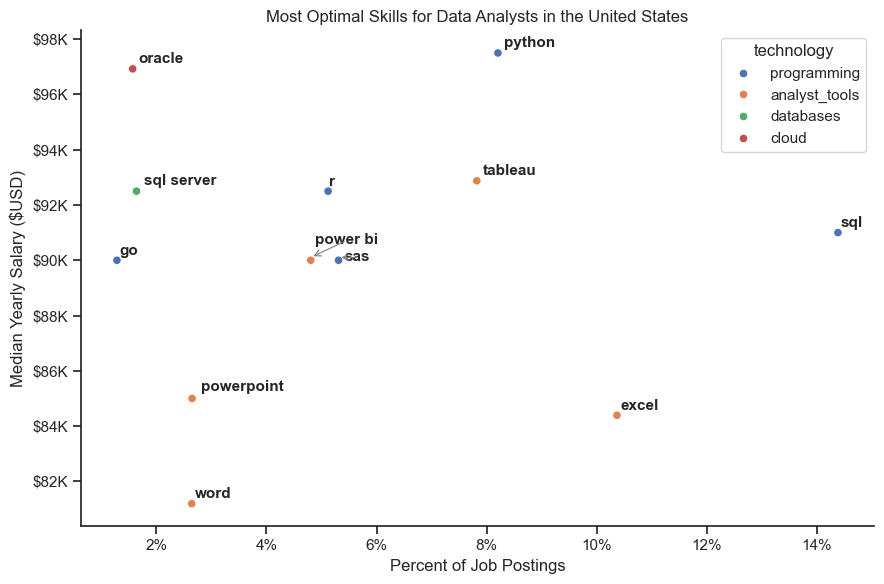

In [12]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt


# Main scatterplot
plt.figure(figsize=(9,6))
plt.legend(fontsize=12)
ax = sns.scatterplot(data=df_plot, x='skill_percent', y='median_salary', hue='technology')
sns.set_theme(style='ticks')
sns.despine()

# Format axes
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y / 1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Label points (add small jitter on Y to reduce perfect overlap)
texts = []
for i in range(len(df_job_skills)):
    x = df_job_skills['skill_percent'].iloc[i]
    y = df_job_skills['median_salary'].iloc[i] + 100  # tiny Y shift to avoid stacking
    label = df_job_skills.index[i]
    texts.append(ax.text(x, y, label, fontsize=11, weight='bold'))

# Adjust text to prevent overlap
adjust_text(
    texts,
    ax=ax,
    arrowprops=dict(arrowstyle="->", color='gray', lw=0.8),
    expand_points=(2.0, 2.0),
    expand_text=(2.0, 2.0),
    force_text=0.6,
    force_points=0.5,
    only_move={'points': 'y', 'text': 'xy'},
    lim=1000
)

# Title and labels
plt.title(f'Most Optimal Skills for {job_tiltle}s in the {job_country}')
plt.ylabel('Median Yearly Salary ($USD)')
plt.xlabel('Percent of Job Postings')
plt.tight_layout()
plt.show()

